In [130]:
import json
import shutil
import pandas as pd

In [131]:
with open('train.json','r') as f:
    Latex_data=json.load(f)

In [133]:
Latex_data['categories']

[{'supercategory': '', 'id': 1, 'name': 'text'},
 {'supercategory': '', 'id': 2, 'name': 'title'},
 {'supercategory': '', 'id': 3, 'name': 'list'},
 {'supercategory': '', 'id': 4, 'name': 'table'},
 {'supercategory': '', 'id': 5, 'name': 'figure'}]

In [134]:
categories={1:'text',2:'title',3:'list',4:'table',5:'figure'}

In [135]:
len(Latex_data['images']),len(Latex_data['annotations'])

(335703, 3263046)

In [ ]:
list_to_save=[]

for i in range(len(Latex_data['annotations'])):#
    id_ano=Latex_data['annotations'][i]['id']
    image_id=Latex_data['annotations'][i]['image_id']
    for k in range(len(Latex_data['images'])):
        if image_id==Latex_data['images'][k]['id']:
            category_id=Latex_data['annotations'][i]['category_id']
            x1,y1,w,h=Latex_data['annotations'][i]['bbox']
            x2,y2=x1+w,y1+h,

            file_name=Latex_data['images'][k]['file_name']

            width=Latex_data['images'][k]['width']
            height=Latex_data['images'][k]['height']
            
            
            list_to_save.append([file_name,width,height,categories[category_id],x1,y1,x2,y2])
    if i%10000==0:
        print(len(list_to_save))

1


In [32]:
len(list_to_save)

120761

In [35]:
Data=pd.DataFrame(list_to_save,columns=['filename','width','height','class','xmin','ymin','xmax','ymax'])

In [15]:
# Data = Data.sample(frac=1).reset_index(drop=True)

In [37]:
Data.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,PMC4055390_00006.jpg,601,792,text,50.58,490.86,290.73,743.02
1,PMC4055390_00006.jpg,601,792,text,308.61,490.87,548.80,743.03
2,PMC4055390_00006.jpg,601,792,text,149.68,70.61,449.55,82.71
3,PMC4055390_00006.jpg,601,792,text,50.58,395.30,548.71,417.85
4,PMC4055390_00006.jpg,601,792,table,50.58,89.60,548.72,372.58


In [38]:
Data.to_csv('train.csv',index=False)

### Visulization:

In [60]:
import cv2
from PIL import Image

In [81]:
Unique_images=Data['filename'].unique()

In [125]:
image_name=Unique_images[52]
One_image_result=Data[Data['filename']==image_name]

In [126]:
One_image_result=One_image_result.reset_index(drop=True)
One_image_result

,filename,width,height,class,xmin,ymin,xmax,ymax
0,PMC3359716_00001.jpg,601,792,text,50.73,523.09,290.89,556.41
1,PMC3359716_00001.jpg,601,792,text,308.66,239.49,548.90,466.37
2,PMC3359716_00001.jpg,601,792,text,50.73,607.27,290.95,742.89
3,PMC3359716_00001.jpg,601,792,text,308.66,480.05,548.90,593.29
4,PMC3359716_00001.jpg,601,792,text,193.84,72.92,405.79,82.44
5,PMC3359716_00001.jpg,601,792,text,50.73,205.63,253.96,214.09
6,PMC3359716_00001.jpg,601,792,table,50.73,89.65,548.87,202.53
7,PMC3359716_00001.jpg,601,792,list,60.26,239.80,290.98,513.46
8,PMC3359716_00001.jpg,601,792,list,320.24,597.82,548.89,742.89
9,PMC3359716_00001.jpg,601,792,title,50.73,572.11,274.30,598.43


In [127]:
img=cv2.imread('val/'+image_name)

In [128]:
for i in range(len(One_image_result)):
    if One_image_result['class'][i]=='text':
        cv2.rectangle(img,(int(One_image_result['xmin'][i]),int(One_image_result['ymin'][i])),(int(One_image_result['xmax'][i]),int(One_image_result['ymax'][i])),(0,0,0),1)
        
    if One_image_result['class'][i]=='table':
        cv2.rectangle(img,(int(One_image_result['xmin'][i]),int(One_image_result['ymin'][i])),(int(One_image_result['xmax'][i]),int(One_image_result['ymax'][i])),(255,0,0),1)
    if One_image_result['class'][i]=='list':
        cv2.rectangle(img,(int(One_image_result['xmin'][i]),int(One_image_result['ymin'][i])),(int(One_image_result['xmax'][i]),int(One_image_result['ymax'][i])),(0,255,0),1)
    if One_image_result['class'][i]=='title':
        cv2.rectangle(img,(int(One_image_result['xmin'][i]),int(One_image_result['ymin'][i])),(int(One_image_result['xmax'][i]),int(One_image_result['ymax'][i])),(0,0,255),1)
    if One_image_result['class'][i]=='figure':
        cv2.rectangle(img,(int(One_image_result['xmin'][i]),int(One_image_result['ymin'][i])),(int(One_image_result['xmax'][i]),int(One_image_result['ymax'][i])),(255,255,0),1)

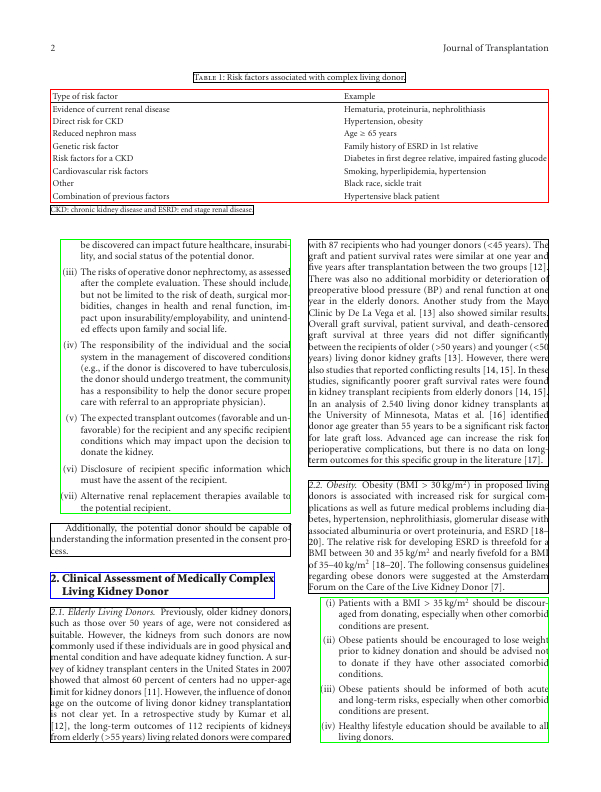

In [129]:
Image.fromarray(img)